In [3]:
import glob
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy
import IPython.display
%matplotlib inline


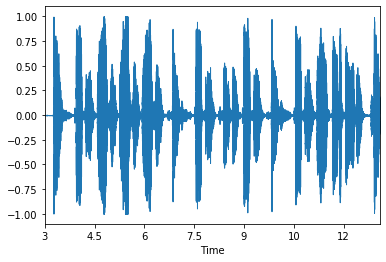

In [4]:
 
def plot_specgram(file_path):
    y, sr = librosa.load(file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(file_path.split("/")[-2])
    plt.tight_layout()
 
sound_file_paths = ["data_audio/cp/audio_1_1.wav",
                    "data_audio/cp/audio_2_1.wav",
                    "data_audio/cp/audio_3_1.wav",
                    "data_audio/cp/audio_4_1.wav",
                    "data_audio/cp/audio_5_1.wav",
                    "data_audio/cp/audio_6_1.wav",
                    "data_audio/cp/audio_7_1.wav",
                    "data_audio/cp/audio_8_1.wav",
                    "data_audio/cp/audio_9_1.wav",
                    "data_audio/cp/audio_10_1.wav",
                    "data_audio/cp/audio_11_1.wav",
                    "data_audio/cp/audio_12_1.wav"
                   ]
 
# for file in sound_file_paths:    
# plot_specgram(sound_file_paths[0])    
x, fs = librosa.load(sound_file_paths[0], sr=None, dtype=None)
librosa.display.waveplot(x, fs, offset=3)
IPython.display.Audio(sound_file_paths[0])

# X = librosa.stft(x)

# Xmag = librosa.amplitude_to_db(X)

# librosa.display.specshow(Xmag, sr=fs, x_axis='time', y_axis='log')



/usr/local/lib/python3.6/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


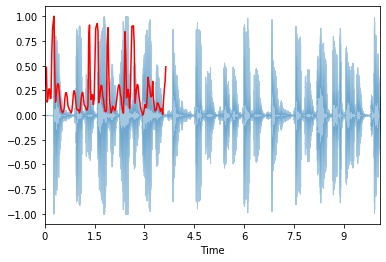

In [5]:
x, fs = librosa.load(sound_file_paths[0], sr=None)
onset_frames = librosa.onset.onset_detect(x, sr=fs, delta=0.04, wait=4)
# onset_times = librosa.frames_to_time(onset_frames)
# onset_samples = librosa.frames_to_samples(onset_frames)

from scipy.io.wavfile import write
spectral_centroids = librosa.feature.spectral_centroid(x, sr=fs)[0]

import sklearn

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

librosa.display.waveplot(x, sr=fs, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r') # normalize for visualization purposes


In [26]:
def extract_features2(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
    ]


def extract_features(x):
    zcr = librosa.zero_crossings(x).sum()    
    energy = scipy.linalg.norm(x)
    return [zcr, energy]

librosa.feature.zero_crossing_rate(x)[0]


array([0.06738281, 0.18896484, 0.2734375 , 0.28076172, 0.25146484,
       0.15332031, 0.08544922, 0.09472656, 0.18554688, 0.29199219,
       0.40722656, 0.51367188, 0.42626953, 0.32666016, 0.23779297,
       0.14697266, 0.13330078, 0.12695312, 0.10351562, 0.07519531,
       0.08056641, 0.06835938, 0.05517578, 0.04541016, 0.0390625 ,
       0.05761719, 0.09423828, 0.10498047, 0.10107422, 0.08056641,
       0.04638672, 0.03857422, 0.04150391, 0.04296875, 0.04394531,
       0.04541016, 0.07226562, 0.10644531, 0.10302734, 0.09619141,
       0.06982422, 0.03466797, 0.04199219, 0.04492188, 0.04394531,
       0.046875  , 0.04980469, 0.08642578, 0.10595703, 0.1015625 ,
       0.09130859, 0.0546875 , 0.03417969, 0.03857422, 0.04345703,
       0.06884766, 0.20507812, 0.32128906, 0.42138672, 0.40917969,
       0.29052734, 0.17285156, 0.07421875, 0.06640625, 0.16845703,
       0.28955078, 0.39697266, 0.53710938, 0.47753906, 0.37402344,
       0.28564453, 0.17431641, 0.12207031, 0.10253906, 0.09814

In [ ]:
# librosa.zero_crossings(x)
# fx = extract_features2(x)

# plt.figure(figsize=(14, 5))
# plt.hist(fx, color='b', range=(0, 0.2), alpha=0.5, bins=20)
# plt.legend(('sound'))
# plt.xlabel('Zero Crossing Rate')
# plt.ylabel('Count')



# X, y = generateFeaturesLabels(features)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# model.fit(X_train, y_train)
# print("Score:",model.score(X_test, y_test))

# cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
# print("cross_val_scores:", cross_val_scores)
# print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_scores.mean(), cross_val_scores.std() * 2))

# predictions = model.predict(X_test)

# cm = metrics.confusion_matrix(y_test, predictions)
# plot_confusion_matrix(cm, class_names)

# return model